"Imbalance" and prime numbers and ... information theory?
==================

by Gaurav Shah

Description
-----------

The motivation for this study is as follows:

The primeness of a number is a true or false proposition.  This makes studying it a little bit 
more difficult.  Is there a way to quantify *how* prime a number is?  The "imbalance" of a 
number ($J$) is an attempt to quantify this.

I haven't defined this fully, and of course it's not clear there is a useful definition at 
all.  Here's a zero order cut:

Start with the 2-level imbalance.  To calculate this, factorize a number $n$ into two 
factors that are the closest to the square root of the number.  In the case of a perfect 
square, they will each be the square root itself.  If it is not a perfect square, these two 
factors will bookend the square root.  In the case of a prime number, they are just 1 and n.  
Call these factors $s$ and $b$, for smaller and bigger.

One definition of the imbalance in this case is $s/(b * n)$.  The factor of $n$ in the imbalance 
is to normalize it.  Another definition is $(b-s)/n$.  Yet another is $(b/s - 1)/(n-1)$.  These are 
all fairly similar, but differ in normalization.



The aim will then be to extend this to a $k$-level imbalance definition.  That is, the more 
a number $n$ can be divided into $k$ fairly equal numbers, the lower the imbalance will be.  
We need a measure for this that gives lower imbalance for larger $k$, and lower imbalance the 
closer the different factors are.  Obviously, this is ill-defined at this point.

Here are some possible definitions of the $k$-level imbalance.  

* $(highest/smallest)^{1/k}$

* Product of (each factor - kth root of n), then perhaps take the kth root of the product.

$r = n^{1/k}$

$J = {\prod(f_i-r)}^{1/k}$

* Measure the length of the diagonal, but then you have to do something more to it, normalization 
wise, like the kth root (or the kth power) or just divide by $n$??  Or the normalization factor 
can be something like:

$r = n^{1/k}$

$\sigma_{norm} = kr^2$

* Is there some reason that simply the sum of the factors doesn't work?  We would need to add some
kind of regularization, so just decomposing it into prime factors isn't the best optimization.  The
regularization would be on the number of factors.

Except that we want to try to see that this reaches interesting values for primes, 2 * primes, etc. and we
would also like to have a pretty round $k$-dimensional factorization be more balanced than a 2-dimensional 
factorization.

Perhaps sum of exponentials of something?  Not as bad as it sounds.  If we choose the metric of 
sum of factors, we have to normalize it somehow.  That normalization could be related to the 
max sum of $n$ factors for any number, which could be $e$ related.  This normalization could lead to 
a better metric.

Regarding this previous: if you take the raw, un-normalized sum as the score, then it can always be
optimized by factorizing any of the components.

$xy > x + y$ if $xy-x-y+1 > 1$.  Which implies $(1-x)(1-y) > 1$.  Which is true as long as $x \geq 2$
and $y\geq2$, which is true in all non-trivial factorizations.

So.  How many factors should a number have to minimize their sum?  They would all have to be 2.  Which brings
in $\log 2$.  Which implies information theory a little bit.  Where do we go from here?

Also, isn't there some optimization related to this when you have $e$ factors, or when each factor is 
closer to $e$?  That would bring in some nice exponents, which would increase the chances of an 
analytically continuationable function.  Which would be nice, wouldn't it?

What are the properties a good $k$-metric should have?

* should be 1 for primes
* should be low for squares, cubes, etc
* should give a "less imbalanced" score to, for example, $23 \times 24$ than to $23 \times 4 \times 6$
* should give a "less imbalanced" score to, for example, $24 \times 24 \times 24$ than to $24 \times 24$
* and it would be really really really cool if it had an analytic continuation

Here's a relatively interesting idea: move away from how "balanced" a number is, to an information theoretic
approach to number theory.  If you have $P(n)$ ways to factorize a number $n$, then $-P(n) \log{P(n)}$ is...
what exactly?  Don't know for sure, but it should be interesting to look at for a start.  This should be
relatively well-traveled territory, though, sadly.  I'm sure someone's done it.  At the very least, the
number of factorizations is pretty easy combinatorics, but there should be well-know results regarding
the number of factorizations related to some infinite series or well-known functions.

If you look at the numbers in a certain range of the imbalance, can you calculate the information content?  The Kolmogorov complexity?  Then plot that value vs. J.

NOTE: 
* another possible definition of J: (largest prime factor of n)/n .  This has the advantage that something like $3^k$ would have a low J.
* Look at the absolute imbalance, not the normalized imbalance: min(a-b), ab = n, a > b.  Look at the series of numbers with a given absolute imbalance.
* There's no polynomial that produces the prime numbers.  
  * What order polynomial is required to create the first n primes?
    * How about if we allow the polynomial to miss by $\epsilon$?
  * Is there a sense in which the primes are the "least polynomial" series?
* Is there a sense that the primes are a maximum of the Kolmogorov complexity (or other metric, such as entropy) under some constraint?  What is that constraint?
  * Is there a sense that the primes take a max number of steps to construct using + and * and maybe raising to a power?
* Is there any significance to the zeros of $\sum z^k/p_k$?  How about $\sum p_k z^k$ ?

Setup
-----

You can probably ignore most of the boring stuff below in the setup section.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import os
import sys
import math

Parameters
---------

$n_{max}$ is the number of points to study the imbalance for.

In [3]:
nmax = 10000

Code for 2 level factorization
----

In [4]:
def closest_two_factors(n):
    '''this is 2-level factorization into the two factors that are closest to each other
    '''

    sqroot = math.sqrt(n)
    i  = int(math.ceil(sqroot))
    
    while(n%i != 0):
        i += 1
    return(n/i, i)

A few different measures of imbalance, as discussed in the introductory section:

In [5]:
def j2d_diff(higher, lower, i):
    return (float(higher) - float(lower)) / i

def j2d_norm(higher, lower, i):
    return (float(higher)/smaller - 1)/i


def calc_imbalances(nmax):
    '''calculate the imbalance, given the two closest factors.  iterate upto a given max number
    '''
    imbalances = zeros(nmax+1)

    for i in range(2, nmax+1):
        lower, higher = closest_two_factors(i)
        imbalances[i] = j2d_diff(higher, lower, i)
        # or float(higher)/(float(lower) * i)
        # of (  float(higher)/float(lower) - 1 )/ (i-1)
        
    # end of for loop
    return imbalances

Run it:

In [6]:
imbals = calc_imbalances(nmax)

Plot the results:

(0, 500)

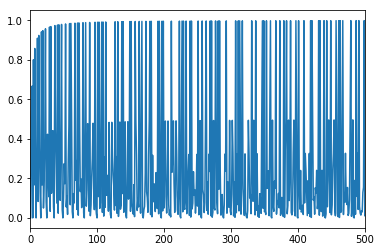

In [7]:
fig, ax = subplots()
ax.plot(imbals)
ax.set_xlim(0, 500)

The obvious structure of this can be explained.  Note that the metric used is $(higher - lower)/n$, so 
for squares, the value is $0$.  For primes, it's $1-1/p$, which tends to one as $p \rightarrow \infty$.

The line that's at approximately 0.5 is the set of numbers that are 2*p where p is a prime.  These are, 
of course, one half the density of the set of primes.  Similarly for the line numbers 3*p, which is less 
obvious, because they're one third the density.

We need to understand a few things: for example, for which prime are there other values mixed in?  To explain
the question, every number on the 0.5 line is a 2*p, and every point near the 0.33 line is 3*p, but at what
point do other numbers start getting mingled?

We can also look at this a bit further on, between 5000 and 6000, using only dots:

(5000, 6000)

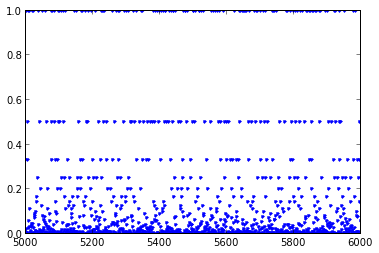

In [9]:
fig, ax = subplots()
ax.plot(imbals, '.')
ax.set_xlim(5000,6000)

(0, 0.1)

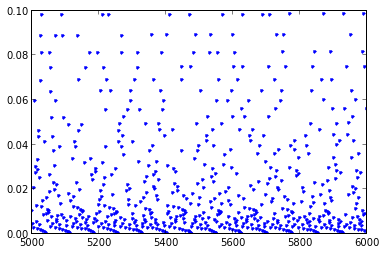

In [22]:
fig, ax = subplots()
ax.plot(imbals, '.')
ax.set_xlim(5000,6000)
ax.set_ylim(0, 0.1)

We can still see the lines, though they're not as obvious.  The pattern near the bottom is very
interesting, so let's look at that in more detail.

(0, 0.01)

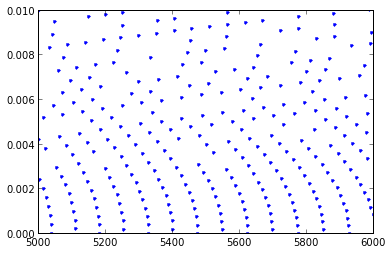

In [20]:
fig, ax = subplots()
ax.plot(imbals, '.')
ax.set_xlim(5000,6000)
ax.set_ylim(0, 0.01)

The curves are easy to explain:  they end with a perfect square $n^2$, and the numbers before them are 
$n^2-1$, $n^2-4$, $n^2-9$, etc, which can obviously be factorized into factors that are close together.  I 
think the straight lines with the slight upward slope consist of points of the form $n^2-m^2$, $(n+1)^2 - m^2$,
$(n+2)^2-m^2$, etc.  Is there a way to distinguish these lines from the lines of the form $p_1 \times p_2$?

The curves are nice, but notice that some of them appear to be missing a point somewhere in between.  This
may be because for certain values, there are possibly better factorizations that pop out other than that
implied by the $n^2 - m^2$ curve that it would otherwise lie on.  What are the constraints on this occurring?

To create the heat map, we need to have x and y axes vectors.  The y axis vector already exists, as "imbals".

The region between 0.01 and 0.04 appears to be where the transition occurs between the two regimes:

(0.01, 0.04)

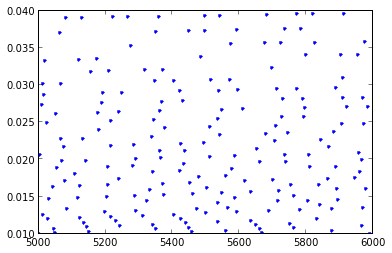

In [23]:
fig, ax = subplots()
ax.plot(imbals, '.')
ax.set_xlim(5000,6000)
ax.set_ylim(0.01, 0.04)

In [13]:
xvec = range(nmax + 1)
nbins = 50
heatmap, xedges, yedges = histogram2d(imbals, xvec, bins = nbins)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

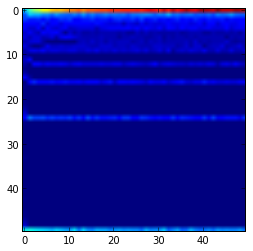

In [14]:
plt.clf()
plt.imshow(heatmap)#, extent = extent)
plt.show()

***I cannot for the life of me figure out how to get the origin at the lower left where it deserves to 
be.  I also need to restrict the heat map to the desired region.  And increase the size.  And do histograms.

***Let's do it with hexagons, to see if that works better

Let's do some histograms, to see if there's anything interesting in the distribution of the values.

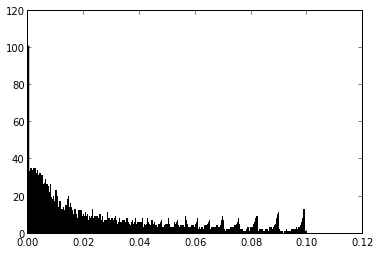

In [15]:
ims = [x for x in imbals if x <= 0.1]

temp = hist(ims, bins = 1000)

This is interesting for a few different reasons.  There are some peaks; they seem to be slightly periodic;
and they have tails, so it's not at an exact number (although this may have something to do with the fact 
that normalization gives, for example, $1-1/p$, which only tends to 1 in the limit, and will not be exactly 1.
It should be interesting to see if the peaks really are at 1/p.

Now we can restrict it to imbalances less than 0.01.

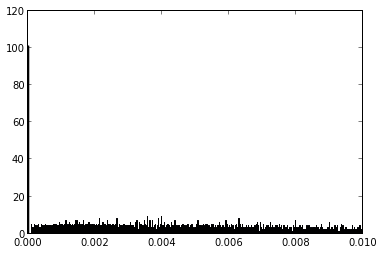

In [16]:
ims = [x for x in imbals if x <= 0.01]

temp = hist(ims, bins = 1000)

Is any of this interesting?  Not sure, but note that the patterns at the bottom (near 0) seem pretty
deterministic, while the pattern at the top, the primes, is highly random (for a sufficiently correct
definition of random).  How does this transformation happen?  Is it anything like the transformation 
from periodic to chaotic?

* try doing a fft of various bands of data
* I suspect that the difference of two factors may be too simplistic to give great results.  Given a prime
factorization, can you determined the imbalance of a number?  Other measures may be more interesting.  
* Consider numbers of the form $n p$ where $n$ is fixed and is not necessarily prime, and $p$ is prime
and increasing.  What will the imbalance of these numbers be?  There's probably a pretty easy limit as $p
\rightarrow \infty$.  What does $p$ have to be to achieve this limit?